# DJIA 30 Stock Prediction using Simple RNN
[Dataset on kaggle](https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231)

## Contents
* Data Understanding
* Data Preprocessing
* Modeling
* Evaluation

In [43]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('data/AABA_2006-01-01_to_2018-01-01.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


### Data Understanding

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [46]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [47]:
data.duplicated().sum()

0

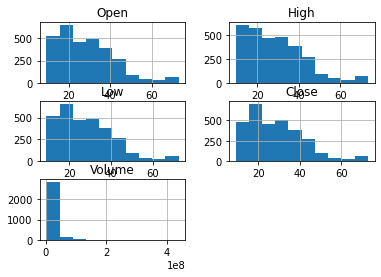

In [48]:
data.hist()
plt.show()

In [49]:
data.nunique()

Date      3019
Open      1913
High      1921
Low       1910
Close     1960
Volume    3018
Name         1
dtype: int64

Just need "Open" column

In [50]:
data = data[['Open']]
data.head()

,Open
0,39.69
1,41.22
2,40.93
3,42.88
4,43.10


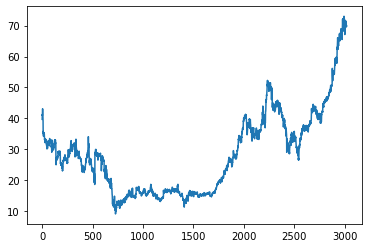

In [51]:
plt.plot(data['Open'])
plt.show()

### Data Preprocessing

In [52]:
X = data['Open'].values

In [53]:
len(X)

3019

In [54]:
X_train, X_test = X[:2500], X[2500:]

In [55]:
len(X_train)

2500

In [56]:
len(X_test)

519

Now we divide data into sequences

In [57]:
seq = 30

In [58]:
XT, yT = [], []
for i in range(len(X_train) - seq):
    d = i + seq
    XT.append(X_train[i:d,])
    yT.append(X_train[d])

In [59]:
Xt, yt = [], []
for i in range(len(X_test) - seq):
    d = i + seq
    Xt.append(X_test[i:d,])
    yt.append(X_test[d])

In [60]:
XT = np.array(XT)
Xt = np.array(Xt)

In [61]:
XT = np.reshape(XT, (XT.shape[0], XT.shape[1], 1))
Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))

In [62]:
yT = np.array(yT)
yt = np.array(yt)

In [63]:
XT.shape

(2470, 30, 1)

In [64]:
yT.shape

(2470,)

In [65]:
Xt.shape

(489, 30, 1)

In [66]:
yt.shape

(489,)

### Modeling

In [71]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh', input_shape=(seq, 1)))
model.add(Dense(1))

In [72]:
model.compile(loss='mean_absolute_error', optimizer='adam')

In [73]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


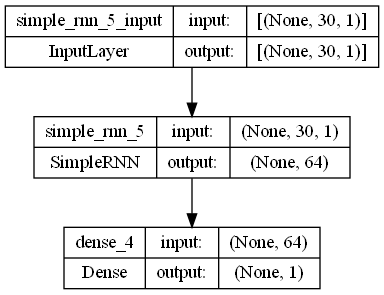

In [74]:
plot_model(model, show_shapes=True)

In [75]:
history = model.fit(XT, yT, epochs=100, batch_size=20)

Epoch 1/100
124/124 [==============================] - 1s 5ms/step - loss: 18.5592
Epoch 2/100
124/124 [==============================] - 1s 6ms/step - loss: 9.2322
Epoch 3/100
124/124 [==============================] - 1s 6ms/step - loss: 5.9604
Epoch 4/100
124/124 [==============================] - 1s 5ms/step - loss: 3.5510
Epoch 5/100
124/124 [==============================] - 1s 7ms/step - loss: 2.2921
Epoch 6/100
124/124 [==============================] - 1s 5ms/step - loss: 1.6489
Epoch 7/100
124/124 [==============================] - 1s 6ms/step - loss: 1.2764
Epoch 8/100
124/124 [==============================] - 1s 5ms/step - loss: 1.0274
Epoch 9/100
124/124 [==============================] - 1s 5ms/step - loss: 0.8689
Epoch 10/100
124/124 [==============================] - 1s 6ms/step - loss: 0.7772
Epoch 11/100
124/124 [==============================] - 1s 5ms/step - loss: 0.6867
Epoch 12/100
124/124 [==============================] - 1s 6ms/step - loss: 0.6224
Epoch 13/100

124/124 [==============================] - 1s 6ms/step - loss: 0.4128
Epoch 100/100
124/124 [==============================] - 1s 6ms/step - loss: 0.4139


### Evaluation

In [76]:
XTPredicted = model.predict(XT)
XtPredicted = model.predict(Xt)
XFinal = np.concatenate([XTPredicted, XtPredicted], axis=0)

16/16 [==============================] - 0s 3ms/step


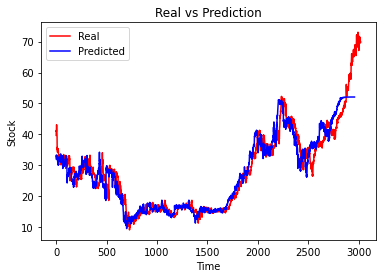

In [77]:
plt.plot(X, color='red', label='Real')
plt.plot(XFinal, color='blue', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock')
plt.title('Real vs Prediction')
plt.legend()
plt.show()